# Demonstration for each model

### General Settings and Import Libraries

*Instruction: please change the file path of the models*
- You should change the suitable path of the trained model directories or files.
- For the Deep bidirectional LSTM and GRU testing, the saved-model directory are `trained_dbgru`, `trained_dblstm`.
- For the PhoBERT model, the saved model is the `trained_Bertmodel` directory.
- For the XLM-RoBERTs model, the saved-model file is `model_max_weighted_f1.pth`, the file path is also up to you.

In [1]:
import pprint
import numpy as np
import pandas as pd
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
from tqdm import tqdm

from sklearn import preprocessing, metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import torch
from torch import Tensor
from torch.utils.data import DataLoader
from torch.optim import AdamW

import torchtext
import torchtext.transforms as T
import torchtext.functional as F
from torchtext.models import RobertaClassificationHead, XLMR_BASE_ENCODER


import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras import layers

from transformers import RobertaModel, RobertaConfig, RobertaTokenizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, AutoModel
from datasets import load_dataset, load_metric

c:\Users\DELL\Programming\python\StockReview.IntroAI.20222\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. TF-IDF with Random Forest

## 2. DBGRU

In [10]:
dbgru = tf.keras.models.load_model('output/trained_dbgru') #manually change the path suitable for training

In [11]:
dbgru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, None, 128)         291712    
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 128)        74496     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, None, 128)         0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               31104     
 nal)                                                            
                                                      

In [36]:
label_mapping = {
    0: 'positive',
    1: 'negative',
    2: 'neutral'
}
sample_text = 'Tính chung cả tuần, VN-Index có 4 phiên tăng và 1 phiên giảm, tích lũy 27 điểm so với tuần trước. Thanh khoản thị trường được cải thiện đáng kể so với khoảng ba tháng trở lại đây khi không ghi nhận phiên nào dưới 13.500 tỷ đồng.'

1/1 [==============================] - 0s 54ms/step


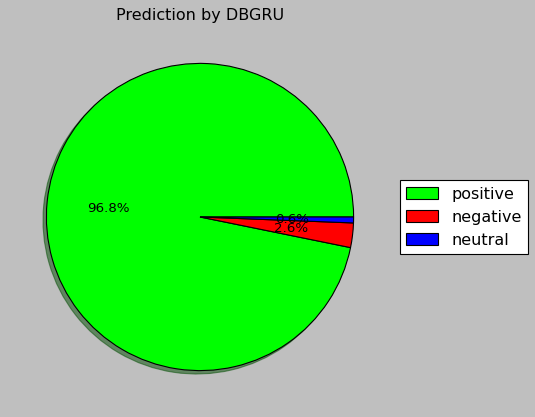

In [37]:
prediction = dbgru.predict([sample_text])[0]
predicted_probs = prediction.tolist()
labeling = [label_mapping[i] for i in range(len(predicted_probs))]
colors = ['#00FF00', '#FF0000', '#0000FF'] #RGB

plt.pie(predicted_probs, autopct='%1.1f%%', colors=colors, shadow=True)
color_patches = [plt.Rectangle((0, 0), 1, 1, fc=color) for color in colors]
plt.legend(color_patches, labeling, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Prediction by DBGRU')
plt.show()

## 3. DBLSTM

In [14]:
dblstm = tf.keras.models.load_model('output/trained_dblstm') #manually change the path suitable for training

In [15]:
dblstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 128)         291712    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                        

In [34]:
label_mapping = {
    0: 'positive',
    1: 'negative',
    2: 'neutral'
}
sample_text = 'Tính chung cả tuần, VN-Index có 4 phiên tăng và 1 phiên giảm'

1/1 [==============================] - 0s 42ms/step


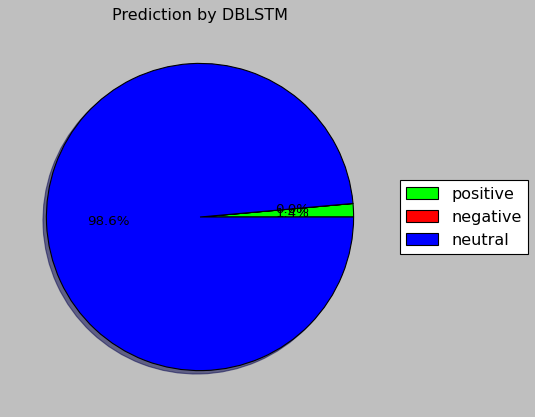

In [35]:
prediction = dbgru.predict([sample_text])[0]
predicted_probs = prediction.tolist()
labeling = [label_mapping[i] for i in range(len(predicted_probs))]
colors = ['#00FF00', '#FF0000', '#0000FF'] #RGB

plt.pie(predicted_probs, autopct='%1.1f%%', colors=colors, shadow=True)
color_patches = [plt.Rectangle((0, 0), 1, 1, fc=color) for color in colors]
plt.legend(color_patches, labeling, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Prediction by DBLSTM')
plt.show()

## 4. phoBERT

In [77]:
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base-v2")
phoBERTmodel = AutoModel.from_pretrained("vinai/phobert-base-v2")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some weights of the model checkpoint at vinai/phobert-base-v2 were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at vinai/phobert-base-v2 and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You sho

In [82]:
phoBERTmodel.load_state_dict(torch.load('output/trained_Bertmodel/pytorch_model.bin'))

RuntimeError: Error(s) in loading state_dict for RobertaModel:
	Missing key(s) in state_dict: "embeddings.position_ids", "embeddings.word_embeddings.weight", "embeddings.position_embeddings.weight", "embeddings.token_type_embeddings.weight", "embeddings.LayerNorm.weight", "embeddings.LayerNorm.bias", "encoder.layer.0.attention.self.query.weight", "encoder.layer.0.attention.self.query.bias", "encoder.layer.0.attention.self.key.weight", "encoder.layer.0.attention.self.key.bias", "encoder.layer.0.attention.self.value.weight", "encoder.layer.0.attention.self.value.bias", "encoder.layer.0.attention.output.dense.weight", "encoder.layer.0.attention.output.dense.bias", "encoder.layer.0.attention.output.LayerNorm.weight", "encoder.layer.0.attention.output.LayerNorm.bias", "encoder.layer.0.intermediate.dense.weight", "encoder.layer.0.intermediate.dense.bias", "encoder.layer.0.output.dense.weight", "encoder.layer.0.output.dense.bias", "encoder.layer.0.output.LayerNorm.weight", "encoder.layer.0.output.LayerNorm.bias", "encoder.layer.1.attention.self.query.weight", "encoder.layer.1.attention.self.query.bias", "encoder.layer.1.attention.self.key.weight", "encoder.layer.1.attention.self.key.bias", "encoder.layer.1.attention.self.value.weight", "encoder.layer.1.attention.self.value.bias", "encoder.layer.1.attention.output.dense.weight", "encoder.layer.1.attention.output.dense.bias", "encoder.layer.1.attention.output.LayerNorm.weight", "encoder.layer.1.attention.output.LayerNorm.bias", "encoder.layer.1.intermediate.dense.weight", "encoder.layer.1.intermediate.dense.bias", "encoder.layer.1.output.dense.weight", "encoder.layer.1.output.dense.bias", "encoder.layer.1.output.LayerNorm.weight", "encoder.layer.1.output.LayerNorm.bias", "encoder.layer.2.attention.self.query.weight", "encoder.layer.2.attention.self.query.bias", "encoder.layer.2.attention.self.key.weight", "encoder.layer.2.attention.self.key.bias", "encoder.layer.2.attention.self.value.weight", "encoder.layer.2.attention.self.value.bias", "encoder.layer.2.attention.output.dense.weight", "encoder.layer.2.attention.output.dense.bias", "encoder.layer.2.attention.output.LayerNorm.weight", "encoder.layer.2.attention.output.LayerNorm.bias", "encoder.layer.2.intermediate.dense.weight", "encoder.layer.2.intermediate.dense.bias", "encoder.layer.2.output.dense.weight", "encoder.layer.2.output.dense.bias", "encoder.layer.2.output.LayerNorm.weight", "encoder.layer.2.output.LayerNorm.bias", "encoder.layer.3.attention.self.query.weight", "encoder.layer.3.attention.self.query.bias", "encoder.layer.3.attention.self.key.weight", "encoder.layer.3.attention.self.key.bias", "encoder.layer.3.attention.self.value.weight", "encoder.layer.3.attention.self.value.bias", "encoder.layer.3.attention.output.dense.weight", "encoder.layer.3.attention.output.dense.bias", "encoder.layer.3.attention.output.LayerNorm.weight", "encoder.layer.3.attention.output.LayerNorm.bias", "encoder.layer.3.intermediate.dense.weight", "encoder.layer.3.intermediate.dense.bias", "encoder.layer.3.output.dense.weight", "encoder.layer.3.output.dense.bias", "encoder.layer.3.output.LayerNorm.weight", "encoder.layer.3.output.LayerNorm.bias", "encoder.layer.4.attention.self.query.weight", "encoder.layer.4.attention.self.query.bias", "encoder.layer.4.attention.self.key.weight", "encoder.layer.4.attention.self.key.bias", "encoder.layer.4.attention.self.value.weight", "encoder.layer.4.attention.self.value.bias", "encoder.layer.4.attention.output.dense.weight", "encoder.layer.4.attention.output.dense.bias", "encoder.layer.4.attention.output.LayerNorm.weight", "encoder.layer.4.attention.output.LayerNorm.bias", "encoder.layer.4.intermediate.dense.weight", "encoder.layer.4.intermediate.dense.bias", "encoder.layer.4.output.dense.weight", "encoder.layer.4.output.dense.bias", "encoder.layer.4.output.LayerNorm.weight", "encoder.layer.4.output.LayerNorm.bias", "encoder.layer.5.attention.self.query.weight", "encoder.layer.5.attention.self.query.bias", "encoder.layer.5.attention.self.key.weight", "encoder.layer.5.attention.self.key.bias", "encoder.layer.5.attention.self.value.weight", "encoder.layer.5.attention.self.value.bias", "encoder.layer.5.attention.output.dense.weight", "encoder.layer.5.attention.output.dense.bias", "encoder.layer.5.attention.output.LayerNorm.weight", "encoder.layer.5.attention.output.LayerNorm.bias", "encoder.layer.5.intermediate.dense.weight", "encoder.layer.5.intermediate.dense.bias", "encoder.layer.5.output.dense.weight", "encoder.layer.5.output.dense.bias", "encoder.layer.5.output.LayerNorm.weight", "encoder.layer.5.output.LayerNorm.bias", "encoder.layer.6.attention.self.query.weight", "encoder.layer.6.attention.self.query.bias", "encoder.layer.6.attention.self.key.weight", "encoder.layer.6.attention.self.key.bias", "encoder.layer.6.attention.self.value.weight", "encoder.layer.6.attention.self.value.bias", "encoder.layer.6.attention.output.dense.weight", "encoder.layer.6.attention.output.dense.bias", "encoder.layer.6.attention.output.LayerNorm.weight", "encoder.layer.6.attention.output.LayerNorm.bias", "encoder.layer.6.intermediate.dense.weight", "encoder.layer.6.intermediate.dense.bias", "encoder.layer.6.output.dense.weight", "encoder.layer.6.output.dense.bias", "encoder.layer.6.output.LayerNorm.weight", "encoder.layer.6.output.LayerNorm.bias", "encoder.layer.7.attention.self.query.weight", "encoder.layer.7.attention.self.query.bias", "encoder.layer.7.attention.self.key.weight", "encoder.layer.7.attention.self.key.bias", "encoder.layer.7.attention.self.value.weight", "encoder.layer.7.attention.self.value.bias", "encoder.layer.7.attention.output.dense.weight", "encoder.layer.7.attention.output.dense.bias", "encoder.layer.7.attention.output.LayerNorm.weight", "encoder.layer.7.attention.output.LayerNorm.bias", "encoder.layer.7.intermediate.dense.weight", "encoder.layer.7.intermediate.dense.bias", "encoder.layer.7.output.dense.weight", "encoder.layer.7.output.dense.bias", "encoder.layer.7.output.LayerNorm.weight", "encoder.layer.7.output.LayerNorm.bias", "encoder.layer.8.attention.self.query.weight", "encoder.layer.8.attention.self.query.bias", "encoder.layer.8.attention.self.key.weight", "encoder.layer.8.attention.self.key.bias", "encoder.layer.8.attention.self.value.weight", "encoder.layer.8.attention.self.value.bias", "encoder.layer.8.attention.output.dense.weight", "encoder.layer.8.attention.output.dense.bias", "encoder.layer.8.attention.output.LayerNorm.weight", "encoder.layer.8.attention.output.LayerNorm.bias", "encoder.layer.8.intermediate.dense.weight", "encoder.layer.8.intermediate.dense.bias", "encoder.layer.8.output.dense.weight", "encoder.layer.8.output.dense.bias", "encoder.layer.8.output.LayerNorm.weight", "encoder.layer.8.output.LayerNorm.bias", "encoder.layer.9.attention.self.query.weight", "encoder.layer.9.attention.self.query.bias", "encoder.layer.9.attention.self.key.weight", "encoder.layer.9.attention.self.key.bias", "encoder.layer.9.attention.self.value.weight", "encoder.layer.9.attention.self.value.bias", "encoder.layer.9.attention.output.dense.weight", "encoder.layer.9.attention.output.dense.bias", "encoder.layer.9.attention.output.LayerNorm.weight", "encoder.layer.9.attention.output.LayerNorm.bias", "encoder.layer.9.intermediate.dense.weight", "encoder.layer.9.intermediate.dense.bias", "encoder.layer.9.output.dense.weight", "encoder.layer.9.output.dense.bias", "encoder.layer.9.output.LayerNorm.weight", "encoder.layer.9.output.LayerNorm.bias", "encoder.layer.10.attention.self.query.weight", "encoder.layer.10.attention.self.query.bias", "encoder.layer.10.attention.self.key.weight", "encoder.layer.10.attention.self.key.bias", "encoder.layer.10.attention.self.value.weight", "encoder.layer.10.attention.self.value.bias", "encoder.layer.10.attention.output.dense.weight", "encoder.layer.10.attention.output.dense.bias", "encoder.layer.10.attention.output.LayerNorm.weight", "encoder.layer.10.attention.output.LayerNorm.bias", "encoder.layer.10.intermediate.dense.weight", "encoder.layer.10.intermediate.dense.bias", "encoder.layer.10.output.dense.weight", "encoder.layer.10.output.dense.bias", "encoder.layer.10.output.LayerNorm.weight", "encoder.layer.10.output.LayerNorm.bias", "encoder.layer.11.attention.self.query.weight", "encoder.layer.11.attention.self.query.bias", "encoder.layer.11.attention.self.key.weight", "encoder.layer.11.attention.self.key.bias", "encoder.layer.11.attention.self.value.weight", "encoder.layer.11.attention.self.value.bias", "encoder.layer.11.attention.output.dense.weight", "encoder.layer.11.attention.output.dense.bias", "encoder.layer.11.attention.output.LayerNorm.weight", "encoder.layer.11.attention.output.LayerNorm.bias", "encoder.layer.11.intermediate.dense.weight", "encoder.layer.11.intermediate.dense.bias", "encoder.layer.11.output.dense.weight", "encoder.layer.11.output.dense.bias", "encoder.layer.11.output.LayerNorm.weight", "encoder.layer.11.output.LayerNorm.bias", "pooler.dense.weight", "pooler.dense.bias". 
	Unexpected key(s) in state_dict: "roberta.embeddings.position_ids", "roberta.embeddings.word_embeddings.weight", "roberta.embeddings.position_embeddings.weight", "roberta.embeddings.token_type_embeddings.weight", "roberta.embeddings.LayerNorm.weight", "roberta.embeddings.LayerNorm.bias", "roberta.encoder.layer.0.attention.self.query.weight", "roberta.encoder.layer.0.attention.self.query.bias", "roberta.encoder.layer.0.attention.self.key.weight", "roberta.encoder.layer.0.attention.self.key.bias", "roberta.encoder.layer.0.attention.self.value.weight", "roberta.encoder.layer.0.attention.self.value.bias", "roberta.encoder.layer.0.attention.output.dense.weight", "roberta.encoder.layer.0.attention.output.dense.bias", "roberta.encoder.layer.0.attention.output.LayerNorm.weight", "roberta.encoder.layer.0.attention.output.LayerNorm.bias", "roberta.encoder.layer.0.intermediate.dense.weight", "roberta.encoder.layer.0.intermediate.dense.bias", "roberta.encoder.layer.0.output.dense.weight", "roberta.encoder.layer.0.output.dense.bias", "roberta.encoder.layer.0.output.LayerNorm.weight", "roberta.encoder.layer.0.output.LayerNorm.bias", "roberta.encoder.layer.1.attention.self.query.weight", "roberta.encoder.layer.1.attention.self.query.bias", "roberta.encoder.layer.1.attention.self.key.weight", "roberta.encoder.layer.1.attention.self.key.bias", "roberta.encoder.layer.1.attention.self.value.weight", "roberta.encoder.layer.1.attention.self.value.bias", "roberta.encoder.layer.1.attention.output.dense.weight", "roberta.encoder.layer.1.attention.output.dense.bias", "roberta.encoder.layer.1.attention.output.LayerNorm.weight", "roberta.encoder.layer.1.attention.output.LayerNorm.bias", "roberta.encoder.layer.1.intermediate.dense.weight", "roberta.encoder.layer.1.intermediate.dense.bias", "roberta.encoder.layer.1.output.dense.weight", "roberta.encoder.layer.1.output.dense.bias", "roberta.encoder.layer.1.output.LayerNorm.weight", "roberta.encoder.layer.1.output.LayerNorm.bias", "roberta.encoder.layer.2.attention.self.query.weight", "roberta.encoder.layer.2.attention.self.query.bias", "roberta.encoder.layer.2.attention.self.key.weight", "roberta.encoder.layer.2.attention.self.key.bias", "roberta.encoder.layer.2.attention.self.value.weight", "roberta.encoder.layer.2.attention.self.value.bias", "roberta.encoder.layer.2.attention.output.dense.weight", "roberta.encoder.layer.2.attention.output.dense.bias", "roberta.encoder.layer.2.attention.output.LayerNorm.weight", "roberta.encoder.layer.2.attention.output.LayerNorm.bias", "roberta.encoder.layer.2.intermediate.dense.weight", "roberta.encoder.layer.2.intermediate.dense.bias", "roberta.encoder.layer.2.output.dense.weight", "roberta.encoder.layer.2.output.dense.bias", "roberta.encoder.layer.2.output.LayerNorm.weight", "roberta.encoder.layer.2.output.LayerNorm.bias", "roberta.encoder.layer.3.attention.self.query.weight", "roberta.encoder.layer.3.attention.self.query.bias", "roberta.encoder.layer.3.attention.self.key.weight", "roberta.encoder.layer.3.attention.self.key.bias", "roberta.encoder.layer.3.attention.self.value.weight", "roberta.encoder.layer.3.attention.self.value.bias", "roberta.encoder.layer.3.attention.output.dense.weight", "roberta.encoder.layer.3.attention.output.dense.bias", "roberta.encoder.layer.3.attention.output.LayerNorm.weight", "roberta.encoder.layer.3.attention.output.LayerNorm.bias", "roberta.encoder.layer.3.intermediate.dense.weight", "roberta.encoder.layer.3.intermediate.dense.bias", "roberta.encoder.layer.3.output.dense.weight", "roberta.encoder.layer.3.output.dense.bias", "roberta.encoder.layer.3.output.LayerNorm.weight", "roberta.encoder.layer.3.output.LayerNorm.bias", "roberta.encoder.layer.4.attention.self.query.weight", "roberta.encoder.layer.4.attention.self.query.bias", "roberta.encoder.layer.4.attention.self.key.weight", "roberta.encoder.layer.4.attention.self.key.bias", "roberta.encoder.layer.4.attention.self.value.weight", "roberta.encoder.layer.4.attention.self.value.bias", "roberta.encoder.layer.4.attention.output.dense.weight", "roberta.encoder.layer.4.attention.output.dense.bias", "roberta.encoder.layer.4.attention.output.LayerNorm.weight", "roberta.encoder.layer.4.attention.output.LayerNorm.bias", "roberta.encoder.layer.4.intermediate.dense.weight", "roberta.encoder.layer.4.intermediate.dense.bias", "roberta.encoder.layer.4.output.dense.weight", "roberta.encoder.layer.4.output.dense.bias", "roberta.encoder.layer.4.output.LayerNorm.weight", "roberta.encoder.layer.4.output.LayerNorm.bias", "roberta.encoder.layer.5.attention.self.query.weight", "roberta.encoder.layer.5.attention.self.query.bias", "roberta.encoder.layer.5.attention.self.key.weight", "roberta.encoder.layer.5.attention.self.key.bias", "roberta.encoder.layer.5.attention.self.value.weight", "roberta.encoder.layer.5.attention.self.value.bias", "roberta.encoder.layer.5.attention.output.dense.weight", "roberta.encoder.layer.5.attention.output.dense.bias", "roberta.encoder.layer.5.attention.output.LayerNorm.weight", "roberta.encoder.layer.5.attention.output.LayerNorm.bias", "roberta.encoder.layer.5.intermediate.dense.weight", "roberta.encoder.layer.5.intermediate.dense.bias", "roberta.encoder.layer.5.output.dense.weight", "roberta.encoder.layer.5.output.dense.bias", "roberta.encoder.layer.5.output.LayerNorm.weight", "roberta.encoder.layer.5.output.LayerNorm.bias", "roberta.encoder.layer.6.attention.self.query.weight", "roberta.encoder.layer.6.attention.self.query.bias", "roberta.encoder.layer.6.attention.self.key.weight", "roberta.encoder.layer.6.attention.self.key.bias", "roberta.encoder.layer.6.attention.self.value.weight", "roberta.encoder.layer.6.attention.self.value.bias", "roberta.encoder.layer.6.attention.output.dense.weight", "roberta.encoder.layer.6.attention.output.dense.bias", "roberta.encoder.layer.6.attention.output.LayerNorm.weight", "roberta.encoder.layer.6.attention.output.LayerNorm.bias", "roberta.encoder.layer.6.intermediate.dense.weight", "roberta.encoder.layer.6.intermediate.dense.bias", "roberta.encoder.layer.6.output.dense.weight", "roberta.encoder.layer.6.output.dense.bias", "roberta.encoder.layer.6.output.LayerNorm.weight", "roberta.encoder.layer.6.output.LayerNorm.bias", "roberta.encoder.layer.7.attention.self.query.weight", "roberta.encoder.layer.7.attention.self.query.bias", "roberta.encoder.layer.7.attention.self.key.weight", "roberta.encoder.layer.7.attention.self.key.bias", "roberta.encoder.layer.7.attention.self.value.weight", "roberta.encoder.layer.7.attention.self.value.bias", "roberta.encoder.layer.7.attention.output.dense.weight", "roberta.encoder.layer.7.attention.output.dense.bias", "roberta.encoder.layer.7.attention.output.LayerNorm.weight", "roberta.encoder.layer.7.attention.output.LayerNorm.bias", "roberta.encoder.layer.7.intermediate.dense.weight", "roberta.encoder.layer.7.intermediate.dense.bias", "roberta.encoder.layer.7.output.dense.weight", "roberta.encoder.layer.7.output.dense.bias", "roberta.encoder.layer.7.output.LayerNorm.weight", "roberta.encoder.layer.7.output.LayerNorm.bias", "roberta.encoder.layer.8.attention.self.query.weight", "roberta.encoder.layer.8.attention.self.query.bias", "roberta.encoder.layer.8.attention.self.key.weight", "roberta.encoder.layer.8.attention.self.key.bias", "roberta.encoder.layer.8.attention.self.value.weight", "roberta.encoder.layer.8.attention.self.value.bias", "roberta.encoder.layer.8.attention.output.dense.weight", "roberta.encoder.layer.8.attention.output.dense.bias", "roberta.encoder.layer.8.attention.output.LayerNorm.weight", "roberta.encoder.layer.8.attention.output.LayerNorm.bias", "roberta.encoder.layer.8.intermediate.dense.weight", "roberta.encoder.layer.8.intermediate.dense.bias", "roberta.encoder.layer.8.output.dense.weight", "roberta.encoder.layer.8.output.dense.bias", "roberta.encoder.layer.8.output.LayerNorm.weight", "roberta.encoder.layer.8.output.LayerNorm.bias", "roberta.encoder.layer.9.attention.self.query.weight", "roberta.encoder.layer.9.attention.self.query.bias", "roberta.encoder.layer.9.attention.self.key.weight", "roberta.encoder.layer.9.attention.self.key.bias", "roberta.encoder.layer.9.attention.self.value.weight", "roberta.encoder.layer.9.attention.self.value.bias", "roberta.encoder.layer.9.attention.output.dense.weight", "roberta.encoder.layer.9.attention.output.dense.bias", "roberta.encoder.layer.9.attention.output.LayerNorm.weight", "roberta.encoder.layer.9.attention.output.LayerNorm.bias", "roberta.encoder.layer.9.intermediate.dense.weight", "roberta.encoder.layer.9.intermediate.dense.bias", "roberta.encoder.layer.9.output.dense.weight", "roberta.encoder.layer.9.output.dense.bias", "roberta.encoder.layer.9.output.LayerNorm.weight", "roberta.encoder.layer.9.output.LayerNorm.bias", "roberta.encoder.layer.10.attention.self.query.weight", "roberta.encoder.layer.10.attention.self.query.bias", "roberta.encoder.layer.10.attention.self.key.weight", "roberta.encoder.layer.10.attention.self.key.bias", "roberta.encoder.layer.10.attention.self.value.weight", "roberta.encoder.layer.10.attention.self.value.bias", "roberta.encoder.layer.10.attention.output.dense.weight", "roberta.encoder.layer.10.attention.output.dense.bias", "roberta.encoder.layer.10.attention.output.LayerNorm.weight", "roberta.encoder.layer.10.attention.output.LayerNorm.bias", "roberta.encoder.layer.10.intermediate.dense.weight", "roberta.encoder.layer.10.intermediate.dense.bias", "roberta.encoder.layer.10.output.dense.weight", "roberta.encoder.layer.10.output.dense.bias", "roberta.encoder.layer.10.output.LayerNorm.weight", "roberta.encoder.layer.10.output.LayerNorm.bias", "roberta.encoder.layer.11.attention.self.query.weight", "roberta.encoder.layer.11.attention.self.query.bias", "roberta.encoder.layer.11.attention.self.key.weight", "roberta.encoder.layer.11.attention.self.key.bias", "roberta.encoder.layer.11.attention.self.value.weight", "roberta.encoder.layer.11.attention.self.value.bias", "roberta.encoder.layer.11.attention.output.dense.weight", "roberta.encoder.layer.11.attention.output.dense.bias", "roberta.encoder.layer.11.attention.output.LayerNorm.weight", "roberta.encoder.layer.11.attention.output.LayerNorm.bias", "roberta.encoder.layer.11.intermediate.dense.weight", "roberta.encoder.layer.11.intermediate.dense.bias", "roberta.encoder.layer.11.output.dense.weight", "roberta.encoder.layer.11.output.dense.bias", "roberta.encoder.layer.11.output.LayerNorm.weight", "roberta.encoder.layer.11.output.LayerNorm.bias", "classifier.dense.weight", "classifier.dense.bias", "classifier.out_proj.weight", "classifier.out_proj.bias". 

In [72]:
phoBERTmodel.config.from_pretrained('output/trained_Bertmodel/config.json')

RobertaConfig {
  "_name_or_path": "vinai/phobert-base",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 258,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "tokenizer_class": "PhobertTokenizer",
  "torch_dtype": "float32",
  "transformers_version": "4.29.2",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 64001
}

In [74]:
phoBERTmodel.eval()

RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(64001, 768, padding_idx=1)
    (position_embeddings): Embedding(258, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0-11): 12 x RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropou

In [75]:
sample_text = 'VTP hôm nay bị khối ngoại bán ròng mạnh khoảng gần 7 tỷ đồng; ngoài ra họ cũng bán ròng tại MPC, VEA, VGG,...'

# Tokenize the input text
inputs = tokenizer(sample_text, padding=True, truncation=True, return_tensors="pt")

# Pass the input through the model
with torch.no_grad():
    outputs = phoBERTmodel(**inputs)

# Get the output representations or predictions
output_representations = outputs.last_hidden_state
predictions = outputs.logits

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


AttributeError: 'BaseModelOutputWithPoolingAndCrossAttentions' object has no attribute 'logits'

## 5. XLM - RoBERTa

In [10]:
DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [11]:
def prepare_xlmroberta_model():
    num_classes = 3
    input_dim = 768

    classifier_head = RobertaClassificationHead(num_classes=num_classes, input_dim=input_dim)
    model = XLMR_BASE_ENCODER.get_model(head=classifier_head)
    
    DEMO_MODEL_PATH = 'output/trained_XLMRoBERTa/model_max_weighted_f1.pth'
    model.load_state_dict(torch.load(DEMO_MODEL_PATH))
    model.to(DEVICE)
    
    print(f'Loaded model to [{DEVICE}] in [{DEMO_MODEL_PATH}]')
    return model

In [12]:
def prepare_text_transform():
    text_transform = torchtext.models.XLMR_LARGE_ENCODER.transform()
    return text_transform

In [13]:
def predict_xlmRoberta(sentence, model, text_transform, label_map):
    transformed_text = text_transform(sentence)
    out = model(torch.tensor([transformed_text]).to(DEVICE))
    probabilities = torch.softmax(out, dim=1).squeeze().detach().cpu().numpy()
    predicted_label = label_map[torch.argmax(out).item()]
    return probabilities, predicted_label

In [32]:
label_map = {
    0: 'negative',
    1: 'neutral',
    2: 'postive'
}
sample_text = 'Sau một tuần giao dịch giằng co, tâm lý của nhà đầu tư trở nên thận trọng hơn. Điều này được thể hiện qua diễn biến của phiên hôm nay, khi biên độ dao động của VN-Index không quá 5 điểm. Sau ATO, chỉ số của sàn HoSE vượt trên tham chiếu, nhưng sắc xanh không duy trì được lâu. Đà giảm của một số cổ phiếu vốn hóa lớn kéo thị trường về sát tham chiếu. Diễn biến phân hóa trong nhóm cổ phiếu ngân hàng - nhóm chiếm tỷ trọng cao về vốn hóa - khiến thị trường giữ nhịp đi ngang.'

In [18]:
model = prepare_xlmroberta_model()
text_transform = prepare_text_transform()

Loaded model to [cpu] in [output/trained_XLMRoBERTa/model_max_weighted_f1.pth]


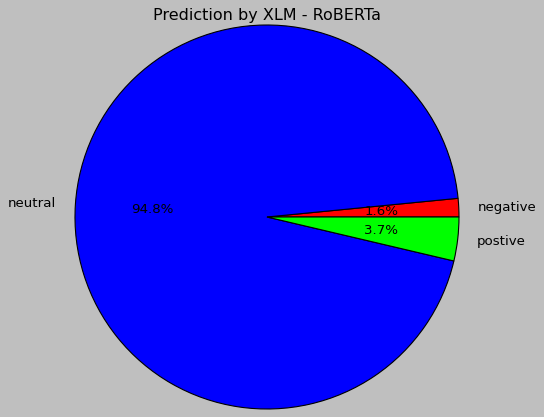

In [33]:
probabilities, predicted_label = predict_xlmRoberta(sample_text, model, text_transform, label_map)

colors = ['#FF0000', '#0000FF', '#00FF00']
percentages = probabilities * 100
plt.pie(percentages, labels=label_map.values(), autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.title('Prediction by XLM - RoBERTa')
plt.show()